In [1]:
# Name: Milin Grover 
# SID: 22107033
# AIML Sentiment Analysis Project on Amazon Fine Food Reviews
# Model used: VADER- Valence Aware Dictionary and sEntiment Reasoner

In [2]:
# importing all the required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
# read in data
df = pd.read_csv("Reviews.csv")
print(df.shape)
df = df.head(500)
print(df.shape)



(568454, 10)
(500, 10)


<function matplotlib.pyplot.show(close=None, block=None)>

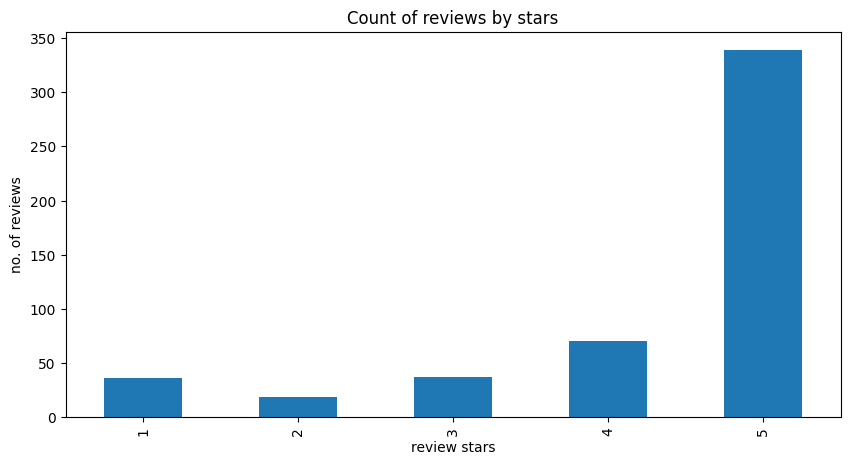

In [4]:
#General pattern of the reviews

ax = df['Score'].value_counts().sort_index().plot(kind='bar', 
                                             title= 'Count of reviews by stars', 
                                             figsize=(10,5))
ax.set_xlabel('review stars')
ax.set_ylabel('no. of reviews')
plt.show

In [5]:
#testing the waters
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
#tokenisation of the example
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [7]:
#tagging the tokens based of their respective part of speech
tagged = nltk.pos_tag(tokens)

In [8]:
#takes the tokens and groups them
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [9]:
## VADER Sentiment Analysis
# bag of words approach
#removes words like 'and' 'or' etc.

In [10]:
# importing the sentimental analyser from natural language toolbook 
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #used to measure progress when analysing the entire data
sia = SentimentIntensityAnalyzer()


In [11]:
#performing sentimental analysis on an arbitrary sentence
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [12]:
sia.polarity_scores('this is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [13]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [14]:
# run the polarity score on the entire dataset
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [15]:
# running the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total= len(df)): #using tqdm to display a progress bar while running the loop
     text = row['Text'] #defining the text on which the analysis is to be done
     myid = row['Id']   #defining and index from the dataset
     res[myid] = sia.polarity_scores(text)  #performing the analysis
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [16]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [17]:
#organising display using pandas
vaders = pd.DataFrame(res).T 
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how="left")

In [18]:
#now we have sentiment score along with the dataframe
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [19]:
#plotting VADER result

<function matplotlib.pyplot.show(close=None, block=None)>

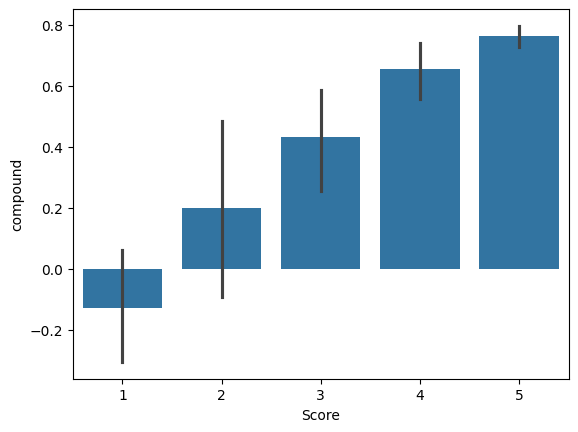

In [20]:
#plotting a bar chart using seaborn and matplotlib
sns.barplot(data=vaders, x='Score', y='compound')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

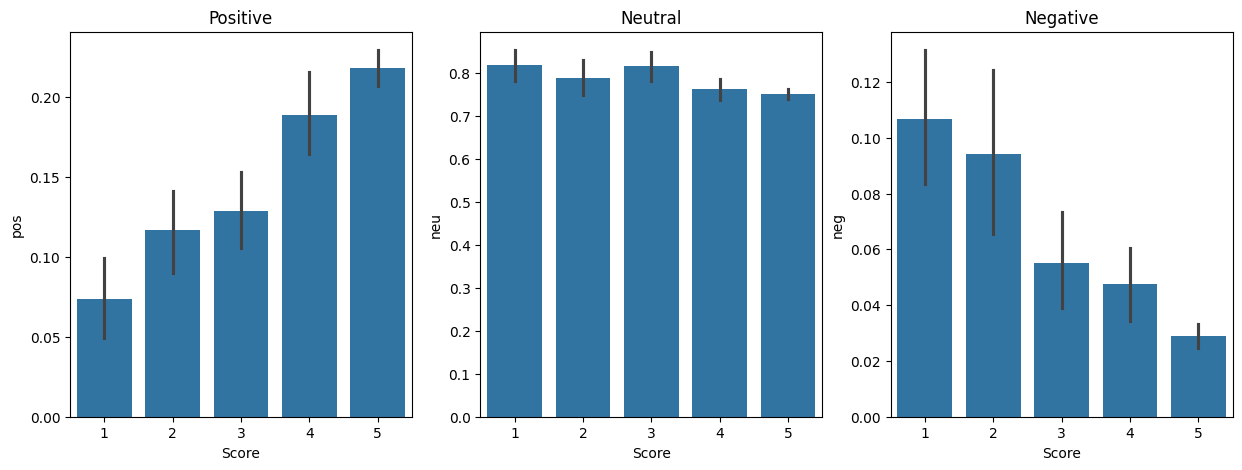

In [21]:
#instead of compound score, let's look at positive, neutral and negative scores each
#now, we plot a barplot for all the three values: neg, pos and neu. 
fig, axs = plt.subplots(1,3, figsize=(15,5)) #definind the dimensions
sns.barplot(data= vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data= vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data= vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout
plt.show

In [22]:
##f1 score

In [23]:
#importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Loading the dataset that we had earlier

data = vaders.head(1000)

# Filter necessary columns
data = data[['Text', 'Score']]


#Now, I have split the data into training and testing sets respectively to begin with my model evaluation
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the test set
def analyze_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 1  # Positive
    elif compound_score <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

test_data['Predicted_Sentiment'] = test_data['Text'].apply(analyze_sentiment)

# Evaluating the results using F1 score
f1 = f1_score(test_data['Score'], test_data['Predicted_Sentiment'], average='weighted')

print("F1 Score:", f1)



F1 Score: 0.005833333333333333


In [24]:
import pandas as pd
from sklearn.metrics import f1_score

# Load the dataset
data = vaders.head(1000)

# Filter necessary columns
data = data[['Text', 'Score']]

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the entire dataset
def analyze_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 1  # Positive
    elif compound_score <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

data['Predicted_Sentiment'] = data['Text'].apply(analyze_sentiment)

# Evaluate the results using F1 score
f1 = f1_score(data['Score'], data['Predicted_Sentiment'], average='weighted')

print("F1 Score for the entire dataset:", f1)


F1 Score for the entire dataset: 0.003949367088607595
